In [1]:
#import libraries

#for manipulation

import numpy as np 
import pandas as pd

#for data visualization 

import matplotlib.pyplot as plt
import seaborn as sns

# For divide data into training and testing set and Modeling
 
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


In [2]:
#lets read the dataset

df = pd.read_csv("dry beans.csv")

In [3]:
# lets check the head of the data 

df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
Features Information:
    
1. Area (A): The area of a bean zone and the number of pixels within its boundaries.
2. Perimeter (P): Bean circumference is defined as the length of its border.
3. Major axis length (L): The distance between the ends of the longest line that can be 
drawn from a bean.
4. Minor axis length (l): The longest line that can be drawn from the bean while 
standing perpendicular to the main axis.
5. Aspect ratio (K): Defines the relationship between L and l.
6. Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
7. Convex area (C): Number of pixels in the smallest convex polygon that can contain 
the area of a bean seed.
8. Equivalent diameter (Ed): The diameter of a circle having the same area as a bean 
seed area.
9. Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
10. Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to 
those found in beans.
11. Roundness (R): Calculated with the following formula: (4piA)/(P^2)
12. Compactness (CO): Measures the roundness of an object: Ed/L
13. ShapeFactor1 (SF1)
14. ShapeFactor2 (SF2)
15. ShapeFactor3 (SF3)
16. ShapeFactor4 (SF4)
17. Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)


In [4]:
# lets check the size of the data..

df.size

231387

In [5]:
# lets check the shape of the data..

df.shape

(13611, 17)

In [6]:
# lets check the info of the data..

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [7]:
#lets describe the dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,13611.0,53048.284549,29324.095717,20420.000000,36328.000000,44652.000000,61332.000000,254616.000000
Perimeter,13611.0,855.283459,214.289696,524.736000,703.523500,794.941000,977.213000,1985.370000
MajorAxisLength,13611.0,320.141867,85.694186,183.601165,253.303633,296.883367,376.495012,738.860154
MinorAxisLength,13611.0,202.270714,44.970091,122.512653,175.848170,192.431733,217.031741,460.198497
AspectRation,13611.0,1.583242,0.246678,1.024868,1.432307,1.551124,1.707109,2.430306
Eccentricity,13611.0,0.750895,0.092002,0.218951,0.715928,0.764441,0.810466,0.911423
ConvexArea,13611.0,53768.200206,29774.915817,20684.000000,36714.500000,45178.000000,62294.000000,263261.000000
EquivDiameter,13611.0,253.064220,59.177120,161.243764,215.068003,238.438026,279.446467,569.374358
Extent,13611.0,0.749733,0.049086,0.555315,0.718634,0.759859,0.786851,0.866195
Solidity,13611.0,0.987143,0.004660,0.919246,0.985670,0.988283,0.990013,0.994677


In [8]:
# Lets check columns of dataset 

df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [9]:
# lets check null values 

df.isna().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [10]:
# there is no null values. 

# if there is any null or missing values 

# Fill-NA function is used to replace these missing values with statistical values such as mean, median or mode. 
# NA means not available
# Pandas have function like fill-NA, drop-NA to treat missing values


# when to use mean, mode or median 

# mean - when there is numerical values in our column
# mode - when there is categorical values in our column
# median - when there is more outliers in our column

In [11]:
# Checking value count of Class 

df.Class.value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [12]:
# lets check unique values in each column

df.nunique()

Area               12011
Perimeter          13351
MajorAxisLength    13543
MinorAxisLength    13543
AspectRation       13543
Eccentricity       13543
ConvexArea         12066
EquivDiameter      12011
Extent             13535
Solidity           13522
roundness          13540
Compactness        13543
ShapeFactor1       13521
ShapeFactor2       13506
ShapeFactor3       13543
ShapeFactor4       13532
Class                  7
dtype: int64

In [13]:
# lets check unique values in Class Feature

df.Class.unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [14]:
# lets check summery for all the Classes

print("Average Area : {0:.2f}".format(df['Area'].mean()))
print("Average Perimeter : {0:.2f}".format(df['Perimeter'].mean()))
print("Average MajorAxisLength : {0:.2f}".format(df['MajorAxisLength'].mean()))
print("Average MinorAxisLength: {0:.2f}".format(df['MinorAxisLength'].mean()))
print("Average AspectRation : {0:.2f}".format(df['AspectRation'].mean()))
print("Average Eccentricity : {0:.2f}".format(df['Eccentricity'].mean()))
print("Average ConvexArea: {0:.2f}".format(df['ConvexArea'].mean()))
print("Average EquivDiameter: {0:.2f}".format(df['EquivDiameter'].mean()))
print("Average Extent : {0:.2f}".format(df['Extent'].mean()))
print("Average Solidity : {0:.2f}".format(df['Solidity'].mean()))
print("Average roundness: {0:.2f}".format(df['roundness'].mean()))
print("Average Compactness : {0:.2f}".format(df['Compactness'].mean()))
print("Average ShapeFactor1: {0:.2f}".format(df['ShapeFactor1'].mean()))
print("Average ShapeFactor2: {0:.2f}".format(df['ShapeFactor2'].mean()))
print("Average ShapeFactor3 : {0:.2f}".format(df['ShapeFactor3'].mean()))
print("Average ShapeFactor4 : {0:.2f}".format(df['ShapeFactor4'].mean()))

Average Area : 53048.28
Average Perimeter : 855.28
Average MajorAxisLength : 320.14
Average MinorAxisLength: 202.27
Average AspectRation : 1.58
Average Eccentricity : 0.75
Average ConvexArea: 53768.20
Average EquivDiameter: 253.06
Average Extent : 0.75
Average Solidity : 0.99
Average roundness: 0.87
Average Compactness : 0.80
Average ShapeFactor1: 0.01
Average ShapeFactor2: 0.00
Average ShapeFactor3 : 0.64
Average ShapeFactor4 : 1.00


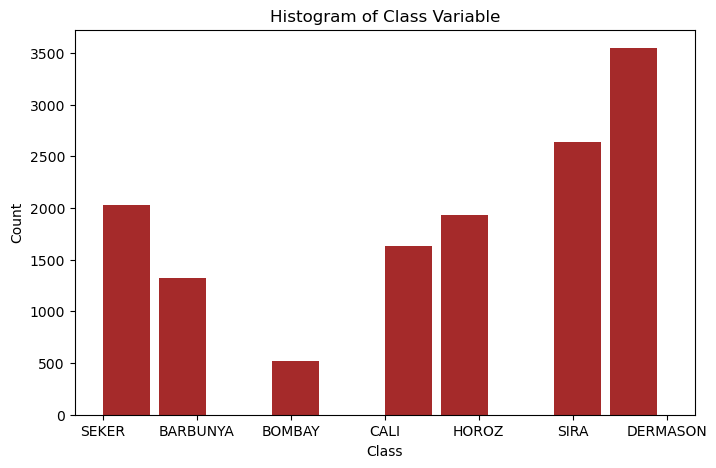

In [15]:
# Lets check count of each Class

plt.rcParams['figure.figsize']=(8,5)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Histogram of Class Variable")
plt.hist(df['Class'], width=0.5, color='Brown')
plt.show()

Area
Skewness :  2.953


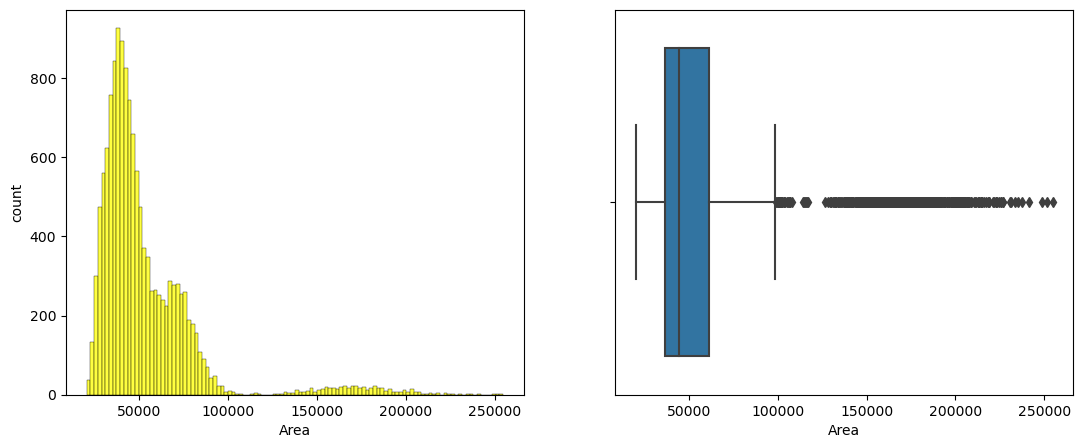

Perimeter
Skewness :  1.626


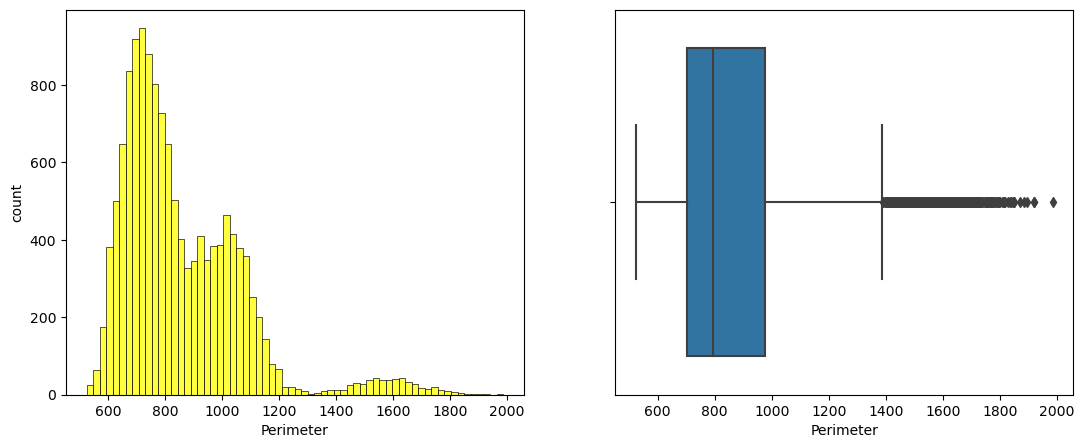

MajorAxisLength
Skewness :  1.358


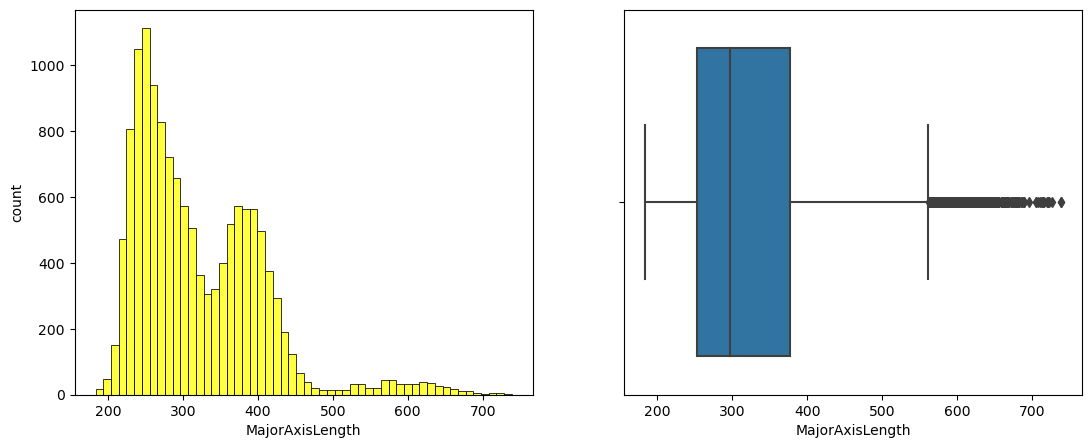

MinorAxisLength
Skewness :  2.238


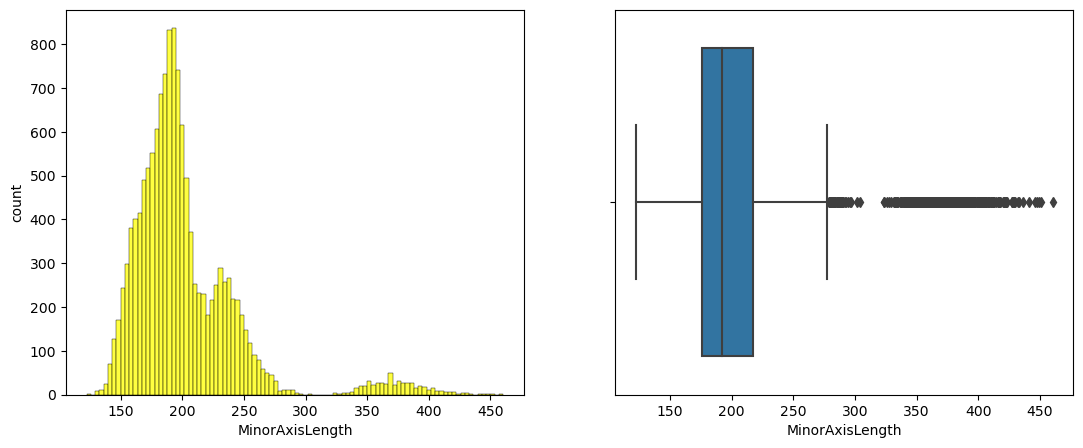

AspectRation
Skewness :  0.583


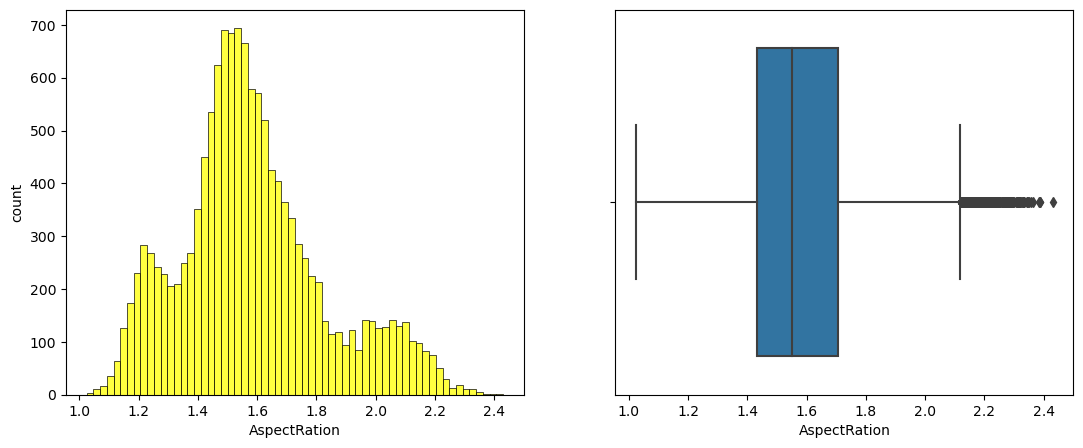

Eccentricity
Skewness :  -1.063


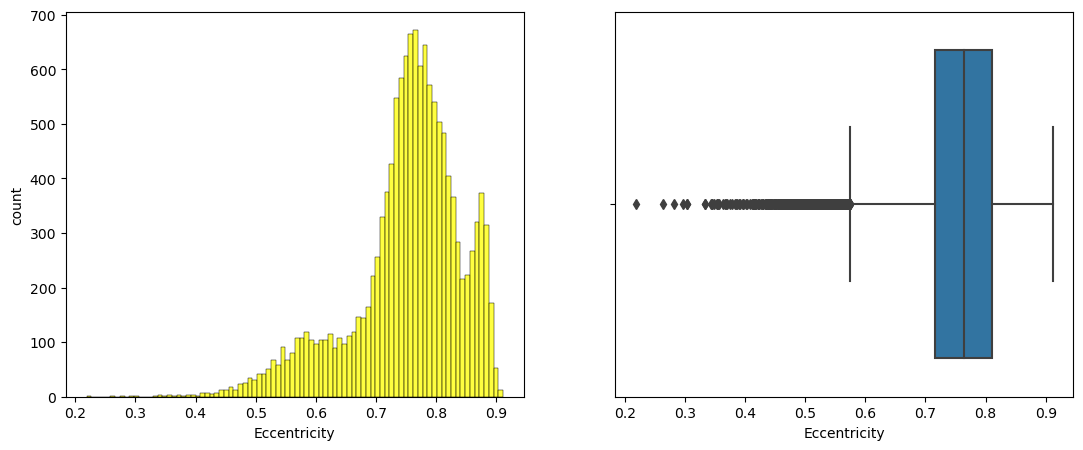

ConvexArea
Skewness :  2.942


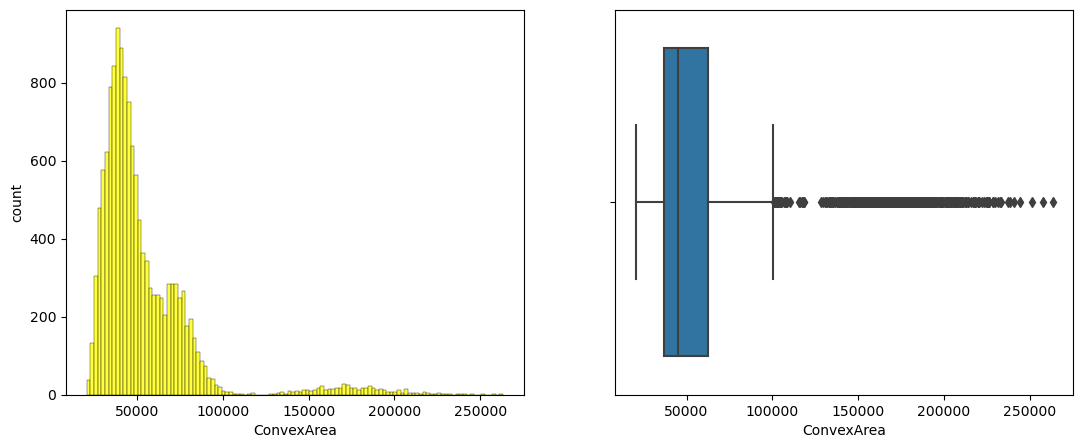

EquivDiameter
Skewness :  1.949


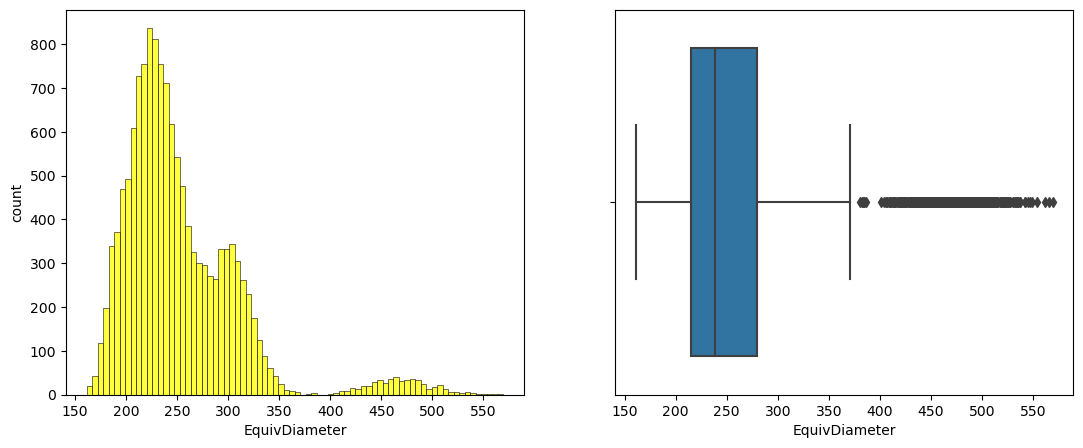

Extent
Skewness :  -0.895


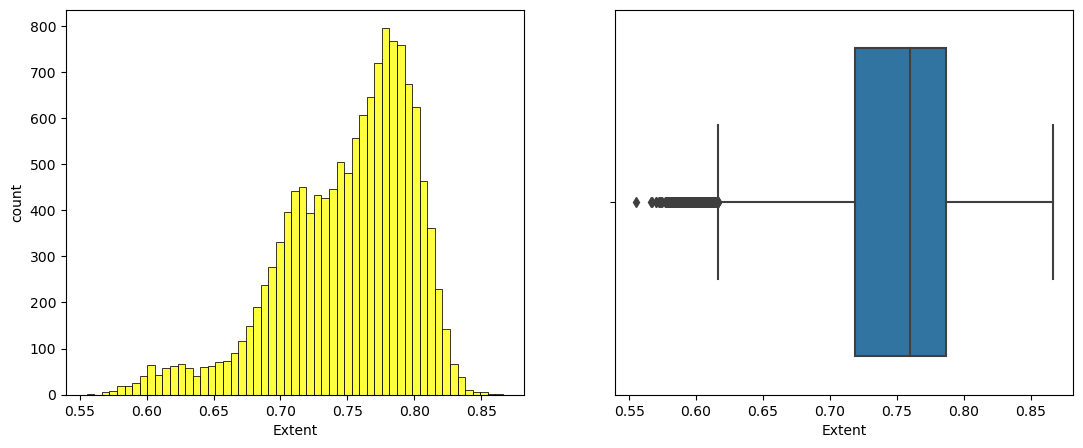

Solidity
Skewness :  -2.55


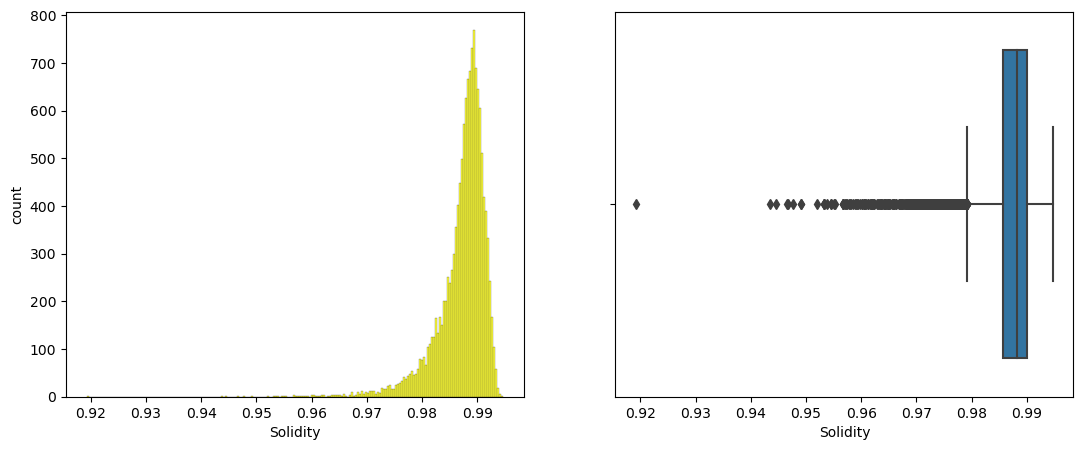

roundness
Skewness :  -0.636


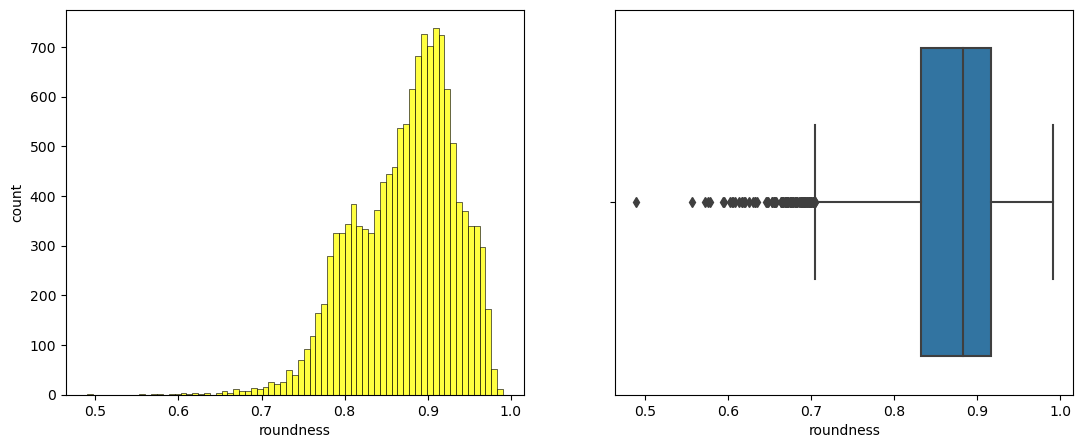

Compactness
Skewness :  0.037


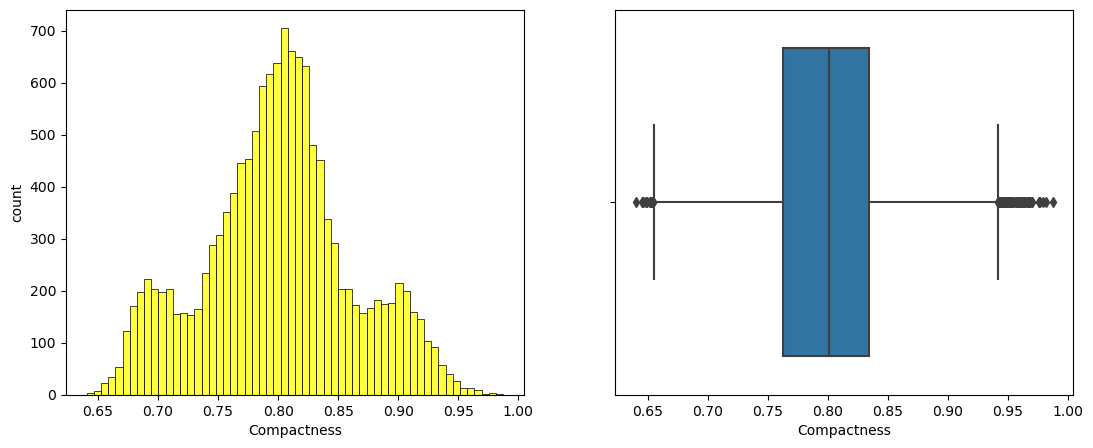

ShapeFactor1
Skewness :  -0.534


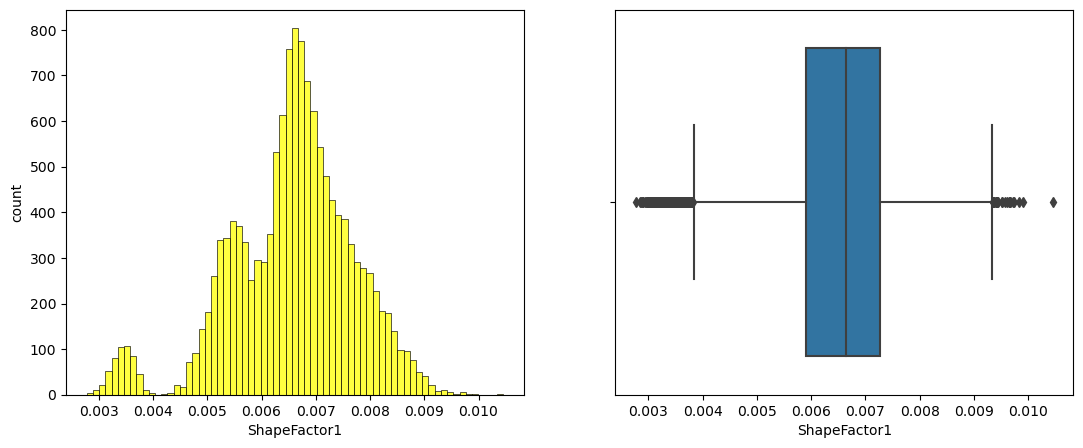

ShapeFactor2
Skewness :  0.301


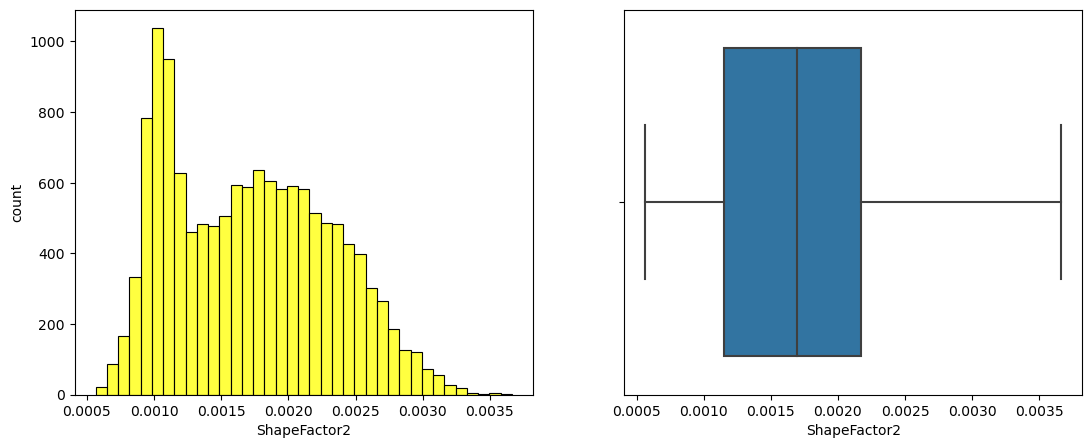

ShapeFactor3
Skewness :  0.242


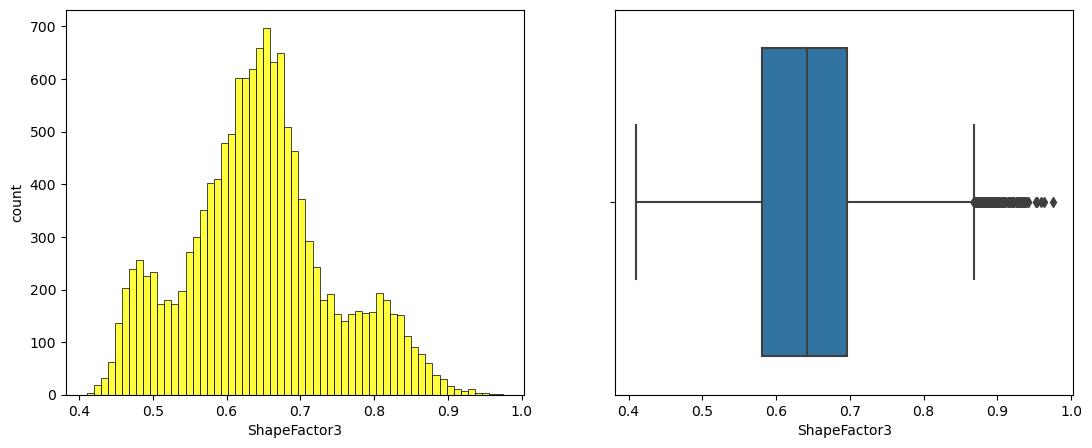

ShapeFactor4
Skewness :  -2.759


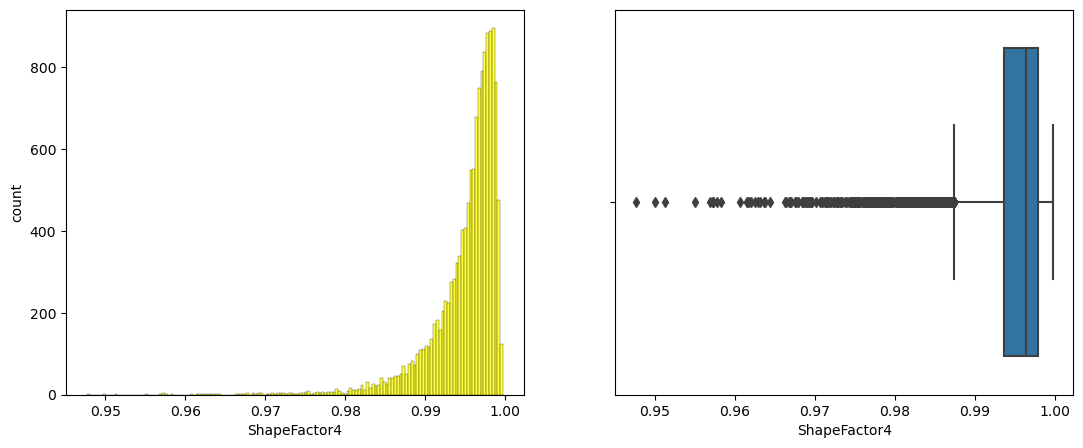

In [16]:
# Lets check outliers 

for i in df:
    if i !='Class':
        print(i)
        print("Skewness : ", round(df[i].skew(),3))
        plt.figure(figsize=(13,5))
        plt.subplot(1,2,1)
        sns.histplot(df[i], color='yellow')
        plt.ylabel('count')
        plt.subplot(1,2,2)
        sns.boxplot(x=df[i])
        plt.show()     

In [17]:
# Lets treat Outliers

#Creating Function to remove Outliers 

def remove_outliers(df):
    for col in df.columns:
        if col != 'Class':
            q25 = np.percentile(df[col] , 25)
            q75 = np.percentile(df[col] , 75)
            iqr = q75 - q25
            cut_off = iqr * 1.5
            lo = q25 - cut_off
            up = q75 + cut_off
            df[col] = df[col].clip(upper = up)
            df[col] = df[col].clip(lower=lo)


In [19]:
# Function calling

remove_outliers(df)

Area
Skewness :  0.957


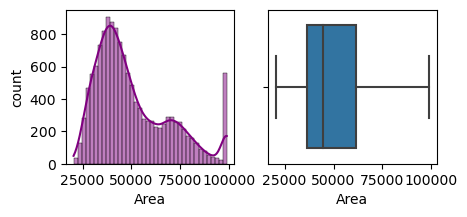

Perimeter
Skewness :  0.962


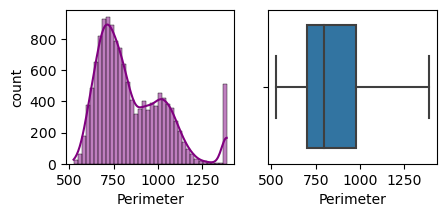

MajorAxisLength
Skewness :  0.971


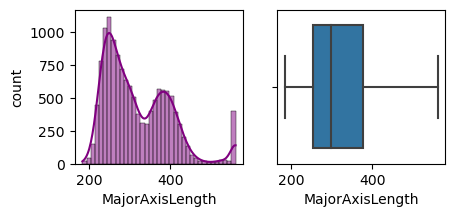

MinorAxisLength
Skewness :  0.728


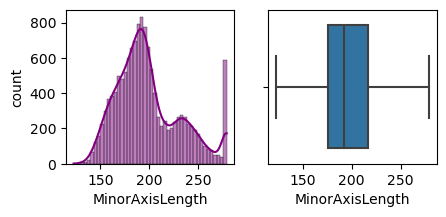

AspectRation
Skewness :  0.473


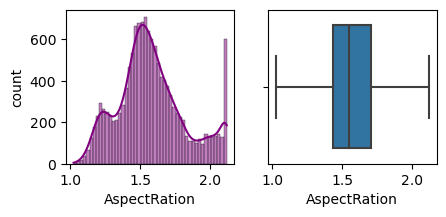

Eccentricity
Skewness :  -0.61


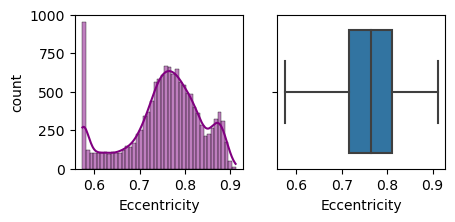

ConvexArea
Skewness :  0.964


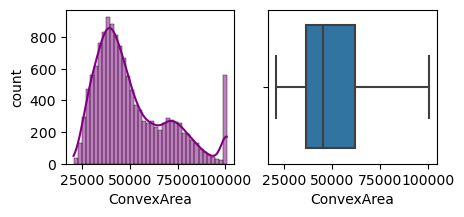

EquivDiameter
Skewness :  0.833


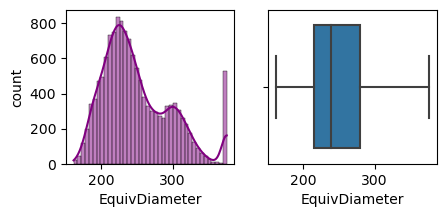

Extent
Skewness :  -0.783


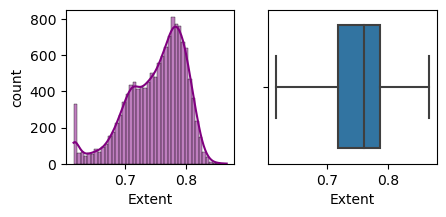

Solidity
Skewness :  -0.845


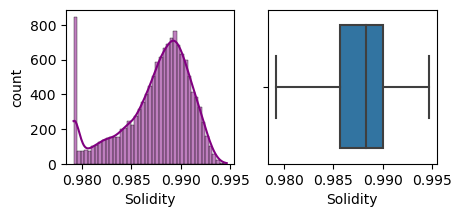

roundness
Skewness :  -0.492


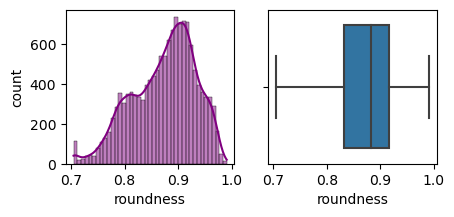

Compactness
Skewness :  0.019


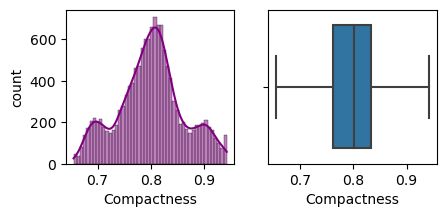

ShapeFactor1
Skewness :  -0.329


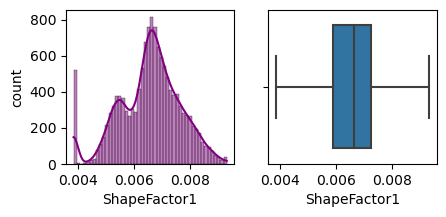

ShapeFactor2
Skewness :  0.301


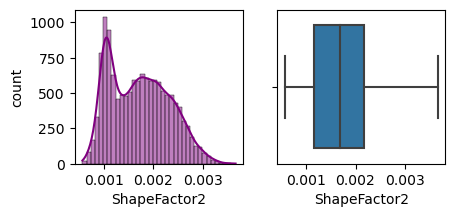

ShapeFactor3
Skewness :  0.193


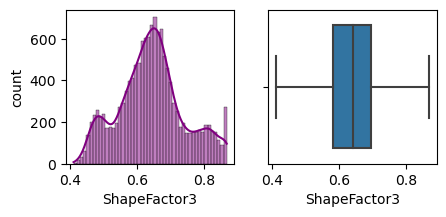

ShapeFactor4
Skewness :  -1.04


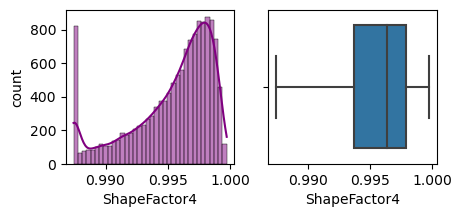

In [20]:
# After removing outliers 

for i in df:
    if i !='Class':
        print(i)
        print("Skewness : ", round(df[i].skew(),3))
        plt.figure(figsize=(10,2))
        plt.subplot(1,4,1)
        sns.histplot(df[i], kde=True, color = 'purple')
        plt.ylabel('count')
        plt.subplot(1,4,2)
        sns.boxplot(x=df[i])
        plt.show()     

C:\Users\HP\AppData\Local\Temp\ipykernel_12472\553874933.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Area'],color='red')
C:\Users\HP\AppData\Local\Temp\ipykernel_12472\553874933.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Perimeter'],color='blue')
C:\Users\HP\AppData\Loc

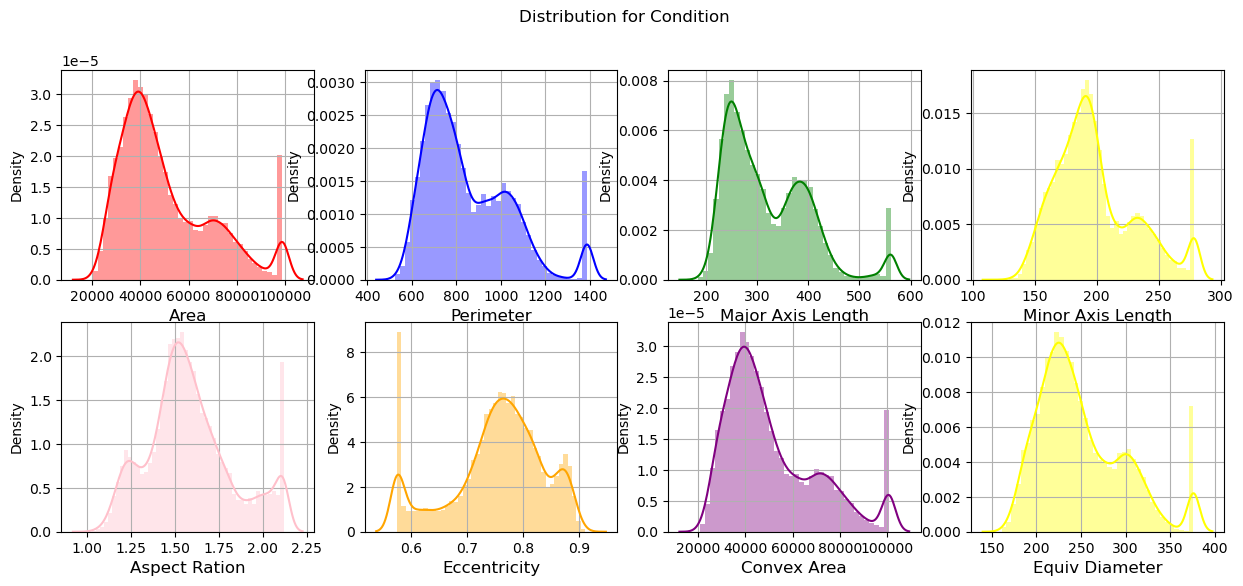

In [27]:
# Lets create a distribution plot for each feature

plt.rcParams['figure.figsize']=(15,6)
plt.subplot(2,4,1)
sns.distplot(df['Area'],color='red')
plt.xlabel('Area',fontsize=12)
plt.grid()

plt.subplot(2,4,2)
sns.distplot(df['Perimeter'],color='blue')
plt.xlabel('Perimeter',fontsize=12)
plt.grid()

plt.subplot(2,4,3)
sns.distplot(df['MajorAxisLength'],color='green')
plt.xlabel("Major Axis Length",fontsize=12)
plt.grid()

plt.subplot(2,4,4)
sns.distplot(df['MinorAxisLength'],color='yellow')
plt.xlabel("Minor Axis Length",fontsize=12)
plt.grid()

plt.subplot(2,4,5)
sns.distplot(df['AspectRation'],color='pink')
plt.xlabel('Aspect Ration',fontsize=12)
plt.grid()

plt.subplot(2,4,6)
sns.distplot(df['Eccentricity'],color='orange')
plt.xlabel('Eccentricity',fontsize=12)
plt.grid()

plt.subplot(2,4,7)
sns.distplot(df['ConvexArea'],color='purple')
plt.xlabel('Convex Area',fontsize=12)
plt.grid()

plt.subplot(2,4,8)
sns.distplot(df['EquivDiameter'],color='yellow')
plt.xlabel('Equiv Diameter',fontsize=12)
plt.grid()


plt.suptitle("Distribution for Condition")
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_12472\3843867902.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Extent'],color='red')
C:\Users\HP\AppData\Local\Temp\ipykernel_12472\3843867902.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Solidity'],color='black')
C:\Users\HP\AppData

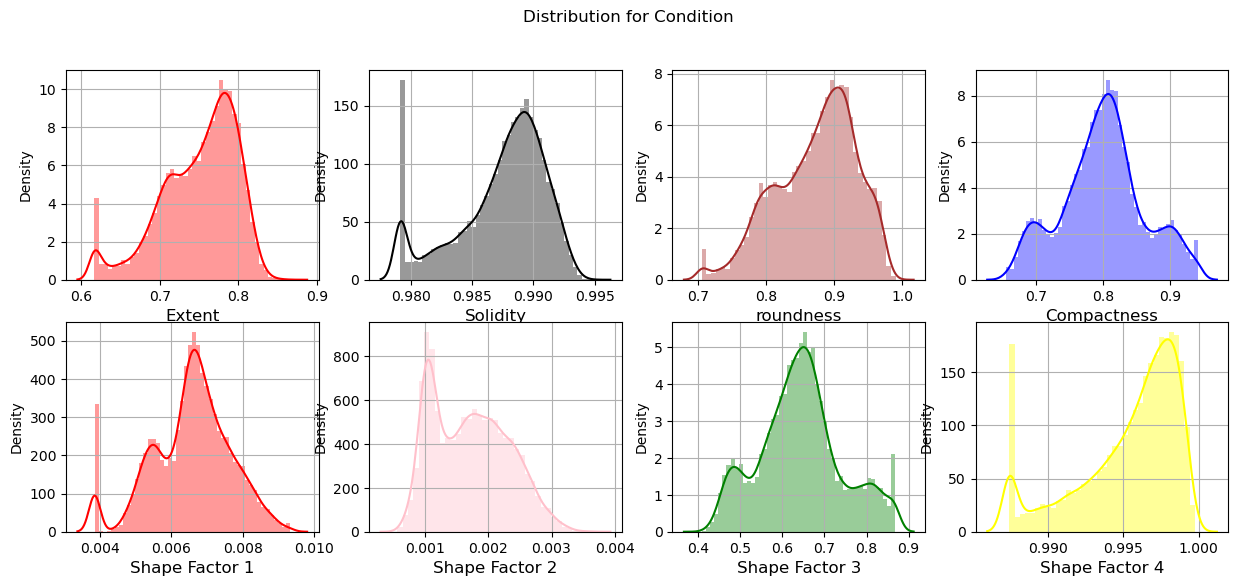

In [26]:
# Lets create a distribution plot for remaining feature

plt.rcParams['figure.figsize']=(15,6)
plt.subplot(2,4,1)
sns.distplot(df['Extent'],color='red')
plt.xlabel("Extent",fontsize=12)
plt.grid()

plt.subplot(2,4,2)
sns.distplot(df['Solidity'],color='black')
plt.xlabel("Solidity",fontsize=12)
plt.grid()

plt.subplot(2,4,3)
sns.distplot(df['roundness'],color='brown')
plt.xlabel("roundness",fontsize=12)
plt.grid()

plt.subplot(2,4,4)
sns.distplot(df['Compactness'],color='blue')
plt.xlabel("Compactness",fontsize=12)
plt.grid()

plt.subplot(2,4,5)
sns.distplot(df['ShapeFactor1'],color='red')
plt.xlabel("Shape Factor 1",fontsize=12)
plt.grid()

plt.subplot(2,4,6)
sns.distplot(df['ShapeFactor2'],color='pink')
plt.xlabel("Shape Factor 2",fontsize=12)
plt.grid()

plt.subplot(2,4,7)
sns.distplot(df['ShapeFactor3'],color='green')
plt.xlabel("Shape Factor 3",fontsize=12)
plt.grid()

plt.subplot(2,4,8)
sns.distplot(df['ShapeFactor4'],color='yellow')
plt.xlabel("Shape Factor 4",fontsize=12)
plt.grid()

plt.suptitle("Distribution for Condition")
plt.show()


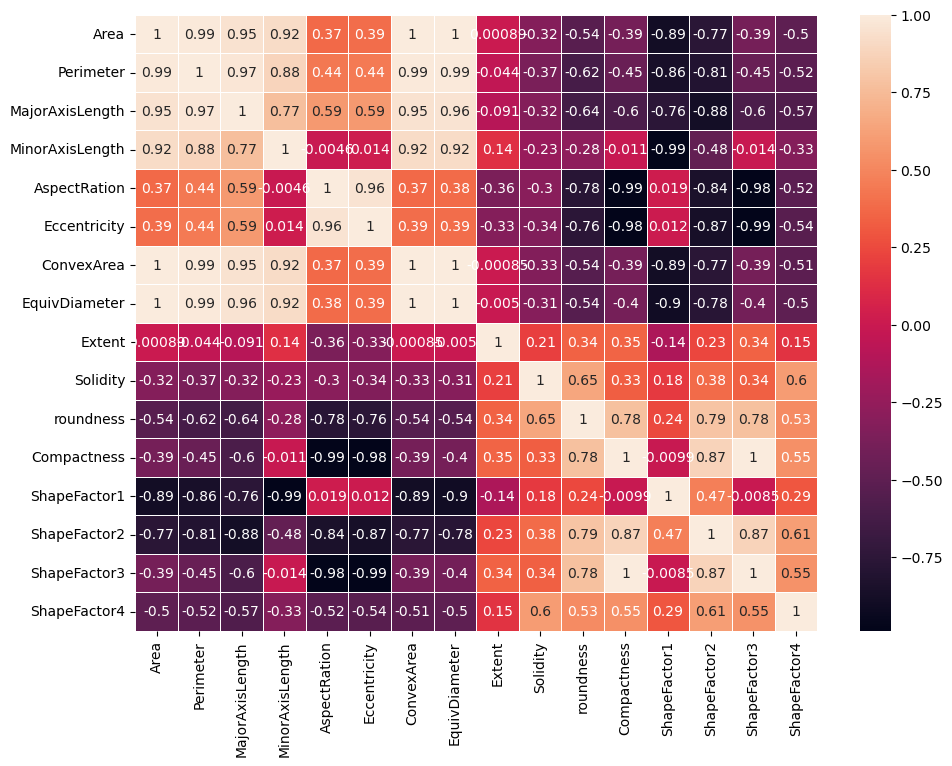

In [28]:
# Creating Heatmap To find correlation

plt.subplots(figsize=(11,8))
cor=sns.heatmap(df.corr(), linewidth = 0.60, annot=True, robust = True)
plt.show()

In [29]:
# Creating function to check correlated features

def correlation(dataset, threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [30]:
#Checking number of correlated features with threshold 0.99

corr_features=correlation(df, 0.99)
len(set(corr_features))

3

In [31]:
# Correlated Features name
corr_features

{'ConvexArea', 'EquivDiameter', 'ShapeFactor3'}

In [32]:
# Before removing correlated features 

df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395.0,610.291,208.178117,173.888747,1.197191,0.57412,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734.0,638.018,200.524796,182.734419,1.097356,0.57412,29172.0,191.272751,0.783968,0.984986,0.887034,0.941972,0.006979,0.003564,0.867978,0.998430,SEKER
2,29380.0,624.110,212.826130,175.931143,1.209713,0.57412,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008.0,645.884,210.557999,182.516516,1.153638,0.57412,30724.0,195.467062,0.782681,0.979156,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140.0,620.134,201.847882,190.279279,1.060798,0.57412,30417.0,195.896503,0.773098,0.990893,0.984877,0.941972,0.006697,0.003665,0.867978,0.999166,SEKER


In [33]:
df.shape

(13611, 17)

In [34]:
# Removing Correlated Features

df=df.drop(['ConvexArea', 'EquivDiameter', 'ShapeFactor3'], axis=1)
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor4,Class
0,28395.0,610.291,208.178117,173.888747,1.197191,0.57412,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.998724,SEKER
1,28734.0,638.018,200.524796,182.734419,1.097356,0.57412,0.783968,0.984986,0.887034,0.941972,0.006979,0.003564,0.998430,SEKER
2,29380.0,624.110,212.826130,175.931143,1.209713,0.57412,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.999066,SEKER
3,30008.0,645.884,210.557999,182.516516,1.153638,0.57412,0.782681,0.979156,0.903936,0.928329,0.007017,0.003215,0.994199,SEKER
4,30140.0,620.134,201.847882,190.279279,1.060798,0.57412,0.773098,0.990893,0.984877,0.941972,0.006697,0.003665,0.999166,SEKER


In [35]:
# After removing correlated features

df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor4,Class
0,28395.0,610.291,208.178117,173.888747,1.197191,0.57412,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.998724,SEKER
1,28734.0,638.018,200.524796,182.734419,1.097356,0.57412,0.783968,0.984986,0.887034,0.941972,0.006979,0.003564,0.998430,SEKER
2,29380.0,624.110,212.826130,175.931143,1.209713,0.57412,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.999066,SEKER
3,30008.0,645.884,210.557999,182.516516,1.153638,0.57412,0.782681,0.979156,0.903936,0.928329,0.007017,0.003215,0.994199,SEKER
4,30140.0,620.134,201.847882,190.279279,1.060798,0.57412,0.773098,0.990893,0.984877,0.941972,0.006697,0.003665,0.999166,SEKER


In [36]:
# lets check the summery statistics for each of the Class 

#for interactivity
from ipywidgets import interact  
@interact   # By using this magical keyword we can convert any normal function to interactive function 

def summery(Class = list(df['Class'].value_counts().index)):
    a=df[df['Class']==Class]
    
    print("-------------------------------------------------")
    print("statistics for Area")
    print("Minimum Area Required : ", a['Area'].min())
    print("Average Area Required : ", a['Area'].mean())
    print("Maximum Area Required : ", a['Area'].max())
        
    print("-------------------------------------------------")
    print("statistics for Perimeter")
    print("Minimum Perimeter : ", a['Perimeter'].min())
    print("Average Perimeter : ", a['Perimeter'].mean())
    print("Maximum Perimeter : ", a['Perimeter'].max())
    
    print("-------------------------------------------------")
    print("statistics for MajorAxisLength")
    print("Minimum MajorAxisLength : {0:.2f}".format(a['MajorAxisLength'].min()))
    print("Average MajorAxisLength : {0:.2f}".format(a['MajorAxisLength'].mean()))
    print("Maximum MajorAxisLength : {0:.2f}".format(a['MajorAxisLength'].max()))
          
    print("-------------------------------------------------")
    print("statistics for MinorAxisLength")
    print("Minimum MinorAxisLength : {0:.2f}".format(a['MinorAxisLength'].min()))
    print("Average MinorAxisLength : {0:.2f}".format(a['MinorAxisLength'].mean()))
    print("Maximum MinorAxisLength : {0:.2f}".format(a['MinorAxisLength'].max()))
          
    print("-------------------------------------------------")
    print("statistics for AspectRation")
    print("Minimum AspectRation : {0:.2f}".format(a['AspectRation'].min()))
    print("Average AspectRation : {0:.2f}".format(a['AspectRation'].mean()))
    print("Maximum AspectRation : {0:.2f}".format(a['AspectRation'].max()))

    print("-------------------------------------------------")
    print("statistics for Solidity")
    print("Minimum Solidity : {0:.2f}".format(a['Solidity'].min()))
    print("Average Solidity : {0:.2f}".format(a['Solidity'].mean()))
    print("Maximum Solidity : {0:.2f}".format(a['Solidity'].max()))

    print("-------------------------------------------------")
    print("statistics for roundness")
    print("Minimum roundness : {0:.2f}".format(a['roundness'].min()))
    print("Average roundness : {0:.2f}".format(a['roundness'].mean()))
    print("Maximum roundness : {0:.2f}".format(a['roundness'].max()))

    print("-------------------------------------------------")
    print("statistics for Compactness")
    print("Minimum Compactness : {0:.2f}".format(a['Compactness'].min()))
    print("Average Compactness : {0:.2f}".format(a['Compactness'].mean()))
    print("Maximum Compactness : {0:.2f}".format(a['Compactness'].max()))

interactive(children=(Dropdown(description='Class', options=('DERMASON', 'SIRA', 'SEKER', 'HOROZ', 'CALI', 'BA…

In [37]:
# Divide data into dependent and independent features 

X = df.drop(['Class'], axis=1)
y=df['Class']

# Scaling by Standardization

In [38]:
from sklearn.preprocessing import StandardScaler

# initialize scaler
standardizer = StandardScaler()

# fit and transform on data
X =  standardizer.fit_transform(X)


# save into diff data
X = pd.DataFrame(X)
X.columns = (df.drop(['Class'], axis=1)).columns

X.head()


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor4
0,-1.158101,-1.256001,-1.374254,-0.754155,-1.593134,-2.164759,0.288191,0.391994,1.443596,1.846568,0.693778,2.402173,1.021155
1,-1.140074,-1.109279,-1.469528,-0.483939,-2.007702,-2.164759,0.704930,-0.690705,0.230145,2.311820,0.368651,3.100894,0.932056
2,-1.105722,-1.182876,-1.316393,-0.691764,-1.541139,-2.164759,0.583210,0.588587,1.269635,1.772042,0.613066,2.235091,1.125032
3,-1.072327,-1.067655,-1.344628,-0.490595,-1.773991,-2.164759,0.678177,-2.321377,0.519054,2.089993,0.403730,2.515075,-0.352257
4,-1.065308,-1.203915,-1.453058,-0.253460,-2.159512,-2.164759,0.478946,0.961891,1.902527,2.311820,0.109128,3.270983,1.155359


In [39]:
# Lets make training and testing model 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state = 42)
print("X_train shape : ", X_train.shape)
print("X_test shape : ", X_test.shape)
print("y_train shape : ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape :  (10208, 13)
X_test shape :  (3403, 13)
y_train shape :  (10208,)
y_test shape:  (3403,)


#  Model

In [40]:
# SVC

# Model
clf = SVC(kernel = "rbf", random_state = 0)

# Fitting
clf.fit(X_train, y_train)


SVC(random_state=0)

In [41]:
#prediction

y_pred = clf.predict(X_test)
y_pred

array(['SEKER', 'BARBUNYA', 'SEKER', ..., 'CALI', 'DERMASON', 'SIRA'],
      dtype=object)

In [44]:
#Lets check accuracy for test data  
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(accuracy*100)

93.24125771378195


In [45]:
# Lets check accuracy for training data 

#Predicting 

y_training = clf.predict(X_train)
acc= accuracy_score(y_train, y_training)
print("Accuracy : ", acc*100)

Accuracy :  93.32876175548589


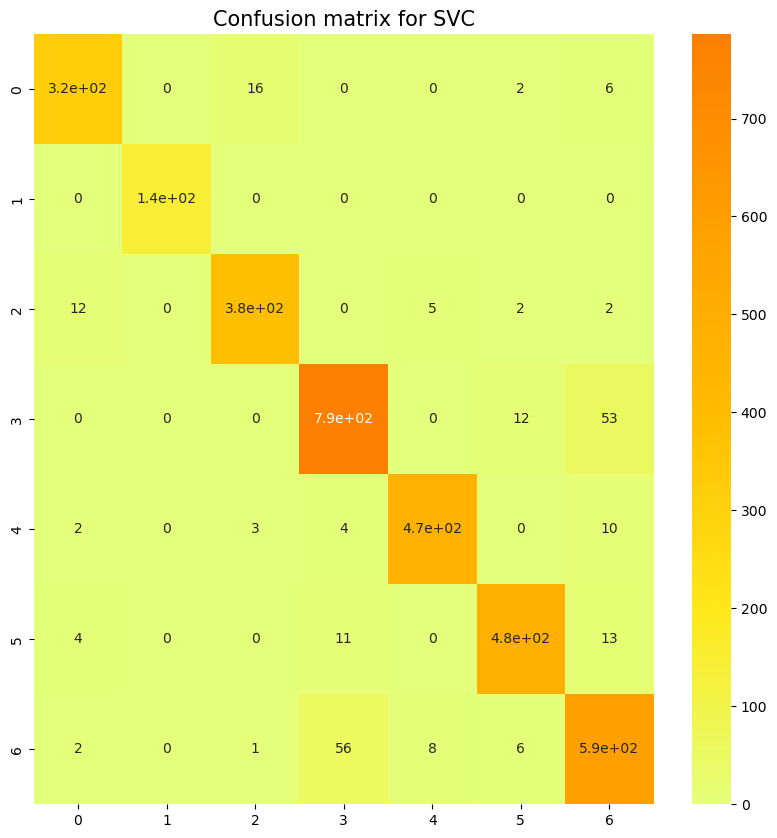

In [48]:
# lets evaluate the model performance 

from sklearn.metrics import confusion_matrix

#Lets print the confusion metrix first

plt.rcParams['figure.figsize'] = (10,10)
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Wistia')
plt.title("Confusion matrix for SVC", fontsize=15)
plt.show()

In [49]:
# Lets print the classifiction report also 
from sklearn.metrics import classification_report

cr= classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

    BARBUNYA       0.94      0.93      0.94       344
      BOMBAY       1.00      1.00      1.00       142
        CALI       0.95      0.95      0.95       402
    DERMASON       0.92      0.92      0.92       851
       HOROZ       0.97      0.96      0.97       486
       SEKER       0.96      0.95      0.95       513
        SIRA       0.88      0.89      0.88       665

    accuracy                           0.93      3403
   macro avg       0.94      0.94      0.94      3403
weighted avg       0.93      0.93      0.93      3403



In [50]:
# As all the values of precision recall and f1-score is nearer to 1
# We can say our model gives good precision, recall and f1-score
# High precision indicates that the model is making fewer false positive predicions 
# While high recall indicates that the model is making fewer false negative predictions

In [51]:
# Lets check the Tail of the Dataset 

df.tail(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor4,Class
13601,42042.0,771.515,288.082674,186.347090,1.545947,0.762615,0.816254,0.989782,0.887574,0.803118,0.006852,0.001758,0.997134,DERMASON
13602,42047.0,768.936,292.975007,183.139141,1.599740,0.780543,0.773890,0.990600,0.893644,0.789754,0.006968,0.001672,0.997777,DERMASON
13603,42049.0,770.185,290.163403,185.051685,1.568013,0.770243,0.756005,0.989318,0.890790,0.797426,0.006901,0.001721,0.997080,DERMASON
13604,42070.0,763.489,289.022373,186.123434,1.552853,0.765046,0.768823,0.988580,0.906936,0.800774,0.006870,0.001743,0.995750,DERMASON
13605,42070.0,760.701,276.691651,193.945367,1.426647,0.713216,0.730813,0.990862,0.913596,0.836460,0.006577,0.001986,0.998176,DERMASON
13606,42097.0,759.696,288.721612,185.944705,1.552728,0.765002,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.998385,DERMASON
13607,42101.0,757.499,281.576392,190.713136,1.476439,0.735702,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.998219,DERMASON
13608,42139.0,759.321,281.539928,191.187979,1.472582,0.734065,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.996767,DERMASON
13609,42147.0,763.779,283.382636,190.275731,1.489326,0.741055,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.995222,DERMASON
13610,42159.0,772.237,295.142741,182.204716,1.619841,0.786693,0.788962,0.989648,0.888380,0.784997,0.007001,0.001640,0.998180,DERMASON


In [52]:
# Lets check how model predicts the result 


prediction= clf.predict((np.array([[42159, 772, 295, 182, 1.6, 0.78, 0.78, 0.98, 0.88, 0.78, 0.007, 0.001, 0.998]])))

print("The suggested insurance claim for given condition is : ", prediction)

The suggested insurance claim for given condition is :  ['DERMASON']


C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [53]:
# Note

# We applied many models to the data, but SVM gave the best accuracy among all of them. 
# SVC - It gives 93 % accuracy and 93 % on training data 
# Logistic Regression - It gives 92% accuracy on testing and 92% on training data 
# Decision Tree Classifier - It gives 87% on testing data and 93% on training data 
# Random Forest Classifier - It gives 92% on testing data and 100% on training data 
# Adaboost Classifier - It gives 62% Accuracy
# SVM using Adaboost - It gives 90% Accuracy
